<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Derivative_Pricing_Binomial_American_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np

## American options : Binomial Pricing

* American Options Payoff
* Dynamic Delta Heding

In [69]:
def american_options(S_o, K, T, r, u, d, N, optype):
  dt = T / N
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0, N+1):
    S[N, i] = S_o * (u ** (i)) * (d ** (N - i))

    if optype == "C":
      C[N, i] = max(S[N, i] - K, 0)
    elif optype == "P":
      C[N, i] = max(K - S[N, i], 0)
    else:
      print("Invalid Optype")

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (
          p * C[j+1, i+1] + (1-p) * C[j+1, i]
        )

      S[j, i] = (
          S_o * (u ** (i)) * (d ** (j - i))
        )

      if optype == "C":
        C[j, i] = max(
            C[j, i], S[j, i] - K
          )
      elif optype == "P":
        C[j, i] = max(
            C[j, i], K -  S[j, i]
          )
      else:
        print("invalid")


  return C[0, 0], C, S


In [70]:
# Put option Pricing
option_price, C, S = american_options(145, 100, 100, 0.1, 1.2, 0.8, 100, "P")

In [71]:
print(option_price)

0.662571812972355


In [63]:
S

array([[1.45000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16000000e+02, 1.74000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.28000000e+01, 1.39200000e+02, 2.08800000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.61515963e-08, 6.92273945e-08, 1.03841092e-07, ...,
        8.33930993e+09, 0.00000000e+00, 0.00000000e+00],
       [3.69212771e-08, 5.53819156e-08, 8.30728734e-08, ...,
        6.67144795e+09, 1.00071719e+10, 0.00000000e+00],
       [2.95370217e-08, 4.43055325e-08, 6.64582987e-08, ...,
        5.33715836e+09, 8.00573754e+09, 1.20086063e+10]])

In [72]:
# Call option Pricing
option_price, C, S = american_options(145, 100, 100, 0.1, 1.2, 0.8, 100, "C")

In [73]:
print(option_price)

144.99546000779415


In [78]:
# Matching Volatility in American Options

def american_options_vol(S_o, K, T, r, sigma, N, optype):
  dt = T / N
  u = np.exp(sigma * np.sqrt(dt))
  d = np.exp(-sigma * np.sqrt(dt))
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0, N+1):
    S[N, i] = S_o * (u ** (i)) * (d ** (N - i))

    if optype == "C":
      C[N, i] = max(S[N, i] - K, 0)
    elif optype == "P":
      C[N, i] = max(K - S[N, i], 0)
    else:
      print("Invalid Optype")

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (
          p * C[j+1, i+1] + (1-p) * C[j+1, i]
        )

      S[j, i] = (
          S_o * (u ** (i)) * (d ** (j - i))
        )

      if optype == "C":
        C[j, i] = max(
            C[j, i], S[j, i] - K
          )
      elif optype == "P":
        C[j, i] = max(
            C[j, i], K -  S[j, i]
          )
      else:
        print("invalid")


  return C[0, 0], C, S

In [79]:
price, C, S = american_options_vol(100, 90, 10, 0, 0.3, 10, "C")
print(price)

39.899240766330934


In [84]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
  call_price, C, S = american_options_vol(100, 90, 1, 0, 0.3, N, "C")
  price_array.append(call_price)
  print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


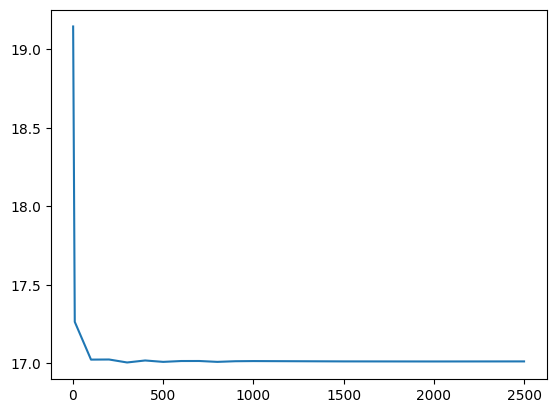

In [86]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]

plt.plot(N, np.array(price_array))


In [92]:
# Dynamic Delta hedging

def american_options(S_o, K, T, r, u, d, N, optype):
  dt = T / N
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N+1):
    S[N, i] = S_o * (u ** (i)) * (d ** (N - i))

    if optype == "C":
      C[N, i] = max(S[N, i] - K, 0)
    elif optype == "P":
      C[N, i] = max(K - S[N, i], 0)
    else:
      print("Invalid Optype")

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (
          p * C[j+1, i+1] + (1-p) * C[j+1, i]
        )

      S[j, i] = (
          S_o * (u ** (i)) * (d ** (j - i))
        )

      if optype == "C":
        C[j, i] = max(
            C[j, i], S[j, i] - K
          )
      elif optype == "P":
        C[j, i] = max(
            C[j, i], K -  S[j, i]
          )
      else:
        print("invalid")

      delta[j, i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i+1] - S[j+1, i])


  return C[0, 0], C, S, delta

In [93]:
price, C, S, delta = american_options(45, 100, 5, 0, 1.5, 1 / 1.5, 5, "C")

In [94]:
price

6.459200000000002

In [95]:
delta

array([[0.34208   , 0.        , 0.        , 0.        , 0.        ],
       [0.1328    , 0.4816    , 0.        , 0.        , 0.        ],
       [0.        , 0.22133333, 0.65511111, 0.        , 0.        ],
       [0.        , 0.        , 0.36888889, 0.84592593, 0.        ],
       [0.        , 0.        , 0.        , 0.61481481, 1.        ]])

In [96]:
# Dynamic Delta hedging European

def euro_options(S_o, K, T, r, u, d, N, optype):
  dt = T / N
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N+1):
    S[N, i] = S_o * (u ** (i)) * (d ** (N - i))

    if optype == "C":
      C[N, i] = max(S[N, i] - K, 0)
    elif optype == "P":
      C[N, i] = max(K - S[N, i], 0)
    else:
      print("Invalid Optype")

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (
          p * C[j+1, i+1] + (1-p) * C[j+1, i]
        )

      S[j, i] = (
          S_o * (u ** (i)) * (d ** (j - i))
        )

      delta[j, i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i+1] - S[j+1, i])


  return C[0, 0], C, S, delta

In [98]:
price_euro, C_euro, S_euro, delta_euro = euro_options(
    50, 52, 5, 0.05, 1.2, 0.8, 5, "C"
)
delta_euro

array([[0.72579669, 0.        , 0.        , 0.        , 0.        ],
       [0.44672292, 0.83592034, 0.        , 0.        , 0.        ],
       [0.09194177, 0.58672101, 0.93425542, 0.        , 0.        ],
       [0.        , 0.12822237, 0.76764645, 1.        , 0.        ],
       [0.        , 0.        , 0.17881944, 1.        , 1.        ]])

In [99]:
price_euro

13.37283461304853